<a href="https://colab.research.google.com/github/tafseeryeamin/Data_Science/blob/main/missing_values_controlling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_excel("C Example 2 - Missing Data.xlsx")

In [47]:
df=data

In [48]:
# 1. Basic Info
# -------------------------------
print("🔍 Shape of dataset:", df.shape)
print("\n📋 Columns:\n", df.columns.tolist())
print("\n🔎 Data types:\n", df.dtypes)
print("\n🧾 Sample data:\n", df.head())


🔍 Shape of dataset: (10, 6)

📋 Columns:
 ['first_name', 'last_name', 'age', 'gender', 'preTestScore', 'postTestScore']

🔎 Data types:
 first_name        object
last_name         object
age              float64
gender            object
preTestScore      object
postTestScore     object
dtype: object

🧾 Sample data:
   first_name last_name   age gender preTestScore postTestScore
0      Jason    Miller  24.0      m            4            25
1       Nour  Sharkasi   NaN    NaN            4            30
2       Tina     Smith  26.0      f            3           NaN
3       Jake    Milner  24.0      m            2            62
4        Amy     Cooze  22.0      f            3            70


In [49]:
# 2. Summary Statistics
# -------------------------------
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
first_name,10,10,Jason,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,10,9,Cooze,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8.0,NaN,NaN,NaN,26.125,6.512351,22.0,23.75,24.0,24.5,42.0
gender,9,3,m,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preTestScore,9.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postTestScore,9.0,9.0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Missing values:
 first_name       0
last_name        0
age              2
gender           1
preTestScore     1
postTestScore    1
dtype: int64


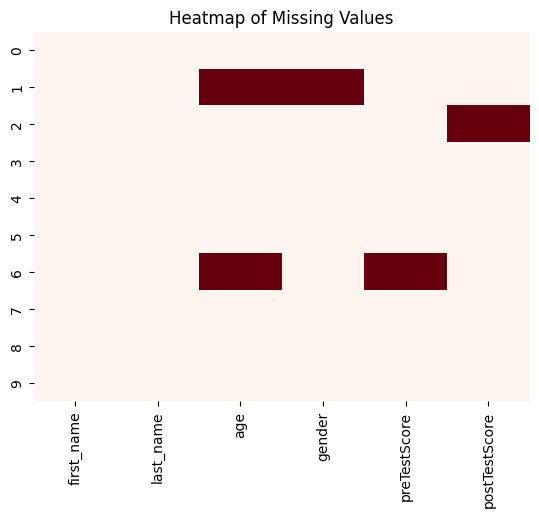

In [50]:
# 3. Missing Values
# -------------------------------
print("\n Missing values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Heatmap of Missing Values')
plt.show()

In [51]:
def missing_values_table(df):
 mis_val = df.isnull().sum()
 mis_val_percent = 100 * df.isnull().sum() / len(df)
 mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
 mis_val_table_ren_columns = mis_val_table.rename(
 columns = {0 : 'Missing Values', 1 : '% of Total Values'})
 mis_val_table_ren_columns = mis_val_table_ren_columns[
 mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
 '% of Total Values', ascending=False).round(1)
 print ("Your selected dataframe has " + str(df.shape[1]) + " columns\n"
 "There are " + str(mis_val_table_ren_columns.shape[0]) +
 " columns that have missing values.")
 return mis_val_table_ren_columns
missing_values_table(df)


Your selected dataframe has 6 columns
There are 4 columns that have missing values.


,Missing Values,% of Total Values
age,2,20.0
gender,1,10.0
preTestScore,1,10.0
postTestScore,1,10.0


In [52]:
rows_with_nan = []
for index, row in df[['age']].iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index) # This line should be indented
print(rows_with_nan)

[1, 6]


In [53]:
df.loc[1:1]

,first_name,last_name,age,gender,preTestScore,postTestScore
1,Nour,Sharkasi,NaN,NaN,4,30


In [54]:
df.loc[6:6]

,first_name,last_name,age,gender,preTestScore,postTestScore
6,Anna,Robles,NaN,m,NaN,39


In [55]:
# 4. Duplicates
# -------------------------------
duplicates = df.duplicated()
print("\n📎 Duplicated rows:", duplicates.sum())
if duplicates.sum() > 0:
    display(df[duplicates].head())


📎 Duplicated rows: 0


In [56]:
# 5. Unique Values per Column
# -------------------------------
print("\n🔢 Unique values per column:\n", df.nunique())


🔢 Unique values per column:
 first_name       10
last_name         9
age               5
gender            3
preTestScore      4
postTestScore     9
dtype: int64


In [57]:
cnt=0
for row in df['gender']:
    try:
        int(row)
        df.loc[cnt, 'gender'] = np.nan
    except ValueError:
        pass
    cnt+=1
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4,25
1,Nour,Sharkasi,NaN,NaN,4,30
2,Tina,Smith,26.0,f,3,NaN
3,Jake,Milner,24.0,m,2,62
4,Amy,Cooze,22.0,f,3,70
5,Jacob,SharkCasco,42.0,m,4,--
6,Anna,Robles,NaN,m,NaN,39
7,Roman,Casco,23.0,f,3,75
8,Ali,Shark,24.0,NaN,???,45
9,Toni,Cooze,24.0,f,2,66


In [58]:
df['gender'].isna().sum()

np.int64(2)

In [59]:
(df['gender'].isna().sum() / len(df)) * 100

np.float64(20.0)

In [60]:
error_values = ['???', '--']
df.replace(error_values, np.nan, inplace=True)
df

<ipython-input-60-28facdb5f9f7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(error_values, np.nan, inplace=True)


,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.0
1,Nour,Sharkasi,NaN,NaN,4.0,30.0
2,Tina,Smith,26.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,22.0,f,3.0,70.0
5,Jacob,SharkCasco,42.0,m,4.0,NaN
6,Anna,Robles,NaN,m,NaN,39.0
7,Roman,Casco,23.0,f,3.0,75.0
8,Ali,Shark,24.0,NaN,NaN,45.0
9,Toni,Cooze,24.0,f,2.0,66.0


In [61]:
dummy_gender_df= pd.get_dummies (df['gender'],dtype=int)
dummy_gender_df

,f,m
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,0,0
9,1,0


In [62]:
df['gender'].unique()

array(['m', nan, 'f'], dtype=object)

In [63]:
df['gender'].mode()

,gender
0,f
1,m


In [64]:
df ["age"].fillna(df.groupby ("gender")["age"].transform ("median"), inplace=True)
df

<ipython-input-64-95f72e90e890>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df ["age"].fillna(df.groupby ("gender")["age"].transform ("median"), inplace=True)


,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.0
1,Nour,Sharkasi,NaN,NaN,4.0,30.0
2,Tina,Smith,26.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,22.0,f,3.0,70.0
5,Jacob,SharkCasco,42.0,m,4.0,NaN
6,Anna,Robles,24.0,m,NaN,39.0
7,Roman,Casco,23.0,f,3.0,75.0
8,Ali,Shark,24.0,NaN,NaN,45.0
9,Toni,Cooze,24.0,f,2.0,66.0


In [65]:
df["gender"].fillna(df["gender"].mode()[0], limit = 1, inplace = True)
df

<ipython-input-65-9508f9580d96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].fillna(df["gender"].mode()[0], limit = 1, inplace = True)


,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.0
1,Nour,Sharkasi,NaN,f,4.0,30.0
2,Tina,Smith,26.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,22.0,f,3.0,70.0
5,Jacob,SharkCasco,42.0,m,4.0,NaN
6,Anna,Robles,24.0,m,NaN,39.0
7,Roman,Casco,23.0,f,3.0,75.0
8,Ali,Shark,24.0,NaN,NaN,45.0
9,Toni,Cooze,24.0,f,2.0,66.0


In [66]:
df["gender"].fillna('m', inplace = True)
df

<ipython-input-66-372f5aa86b1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].fillna('m', inplace = True)


,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.0
1,Nour,Sharkasi,NaN,f,4.0,30.0
2,Tina,Smith,26.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,22.0,f,3.0,70.0
5,Jacob,SharkCasco,42.0,m,4.0,NaN
6,Anna,Robles,24.0,m,NaN,39.0
7,Roman,Casco,23.0,f,3.0,75.0
8,Ali,Shark,24.0,m,NaN,45.0
9,Toni,Cooze,24.0,f,2.0,66.0


In [67]:
df['gender'].unique()

array(['m', 'f'], dtype=object)

In [68]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

df['preTestScore'] = median_imputer.fit_transform(df[['preTestScore']])
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.0
1,Nour,Sharkasi,NaN,f,4.0,30.0
2,Tina,Smith,26.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,22.0,f,3.0,70.0
5,Jacob,SharkCasco,42.0,m,4.0,NaN
6,Anna,Robles,24.0,m,3.0,39.0
7,Roman,Casco,23.0,f,3.0,75.0
8,Ali,Shark,24.0,m,3.0,45.0
9,Toni,Cooze,24.0,f,2.0,66.0


In [69]:
df["postTestScore"] = df["postTestScore"].fillna(
    df.groupby("gender")["postTestScore"].transform("mean")
)
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,24.0,m,4.0,25.00
1,Nour,Sharkasi,NaN,f,4.0,30.00
2,Tina,Smith,26.0,f,3.0,60.25
3,Jake,Milner,24.0,m,2.0,62.00
4,Amy,Cooze,22.0,f,3.0,70.00
5,Jacob,SharkCasco,42.0,m,4.0,42.75
6,Anna,Robles,24.0,m,3.0,39.00
7,Roman,Casco,23.0,f,3.0,75.00
8,Ali,Shark,24.0,m,3.0,45.00
9,Toni,Cooze,24.0,f,2.0,66.00
